In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:

dt_train=pd.read_csv('train.csv')
dt_test=pd.read_csv('test.csv')
combine=[dt_train,dt_test]

In [4]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dt_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
dt_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
dt_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dt_train.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Johansson, Mr. Gustaf Joel",male,1601,B96 B98,S
freq,1,577,7,4,644


In [10]:
dt_train[['Sex','Survived']].groupby(['Sex'],as_index=False).mean()
#Females were more likely to survive

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
dt_train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [12]:
dt_train.groupby(['Embarked','Sex']).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
dtype: int64

In [13]:
dt_train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
dt_train[['Pclass','Survived','Sex']].groupby(['Pclass','Sex'],as_index=False).mean()
#Females in class 1 and 2 has higher survived rate than class 3. 

,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [15]:
dt_train['agegrp']=pd.cut(dt_train['Age'],8)

In [16]:
import seaborn as sns

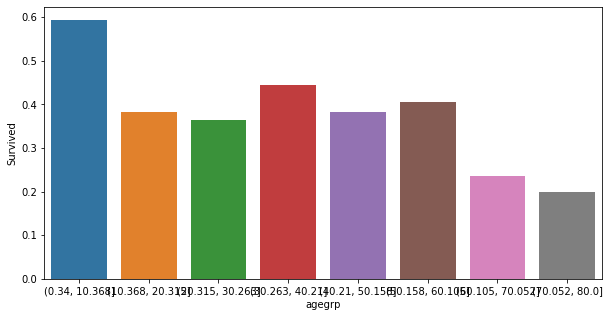

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(data=dt_train,y='Survived',x='agegrp',ci=None)

In [18]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [19]:
for dataset in combine:
    dataset.groupby(['Embarked']).size()

In [20]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [21]:
dt_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
agegrp         177
dtype: int64

In [22]:
dt_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
for dataset in combine: 
    dataset['Embarked']=dataset['Embarked'].map({'S':0,'C':1,'Q':2})

In [24]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegrp
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,"(30.263, 40.21]"


In [25]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [26]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegrp,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,"(20.315, 30.263]",Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,"(30.263, 40.21]",Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,"(20.315, 30.263]",Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,"(30.263, 40.21]",Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,"(30.263, 40.21]",Mr


In [27]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Rev','Dr','Major','Capt','Col','Dr'],'Officer')
    dataset['Title']=dataset['Title'].replace(['Master','Jonkheer','Sir','Don','Dona',\
                                             'Lady','Countess'],'Royalty')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Miss')

In [28]:
dt_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Miss,0.704301
1,Mr,0.156673
2,Mrs,0.792000
3,Officer,0.277778
4,Royalty,0.577778


In [29]:
for dataset in combine: 
    dataset['Title']=dataset['Title'].map({'Mr':1,'Miss':2,'Mrs':3,'Officer':4,'Royalty':5})

In [30]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int(age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

guess_df .head()

1     47.0
4     22.0
6     30.0
8     18.0
18    27.0
Name: Age, dtype: float64

In [31]:
for dataset in combine:
    dataset.loc[dataset['Age']<=10,'Age']=0
    dataset.loc[(dataset['Age']>10)&(dataset['Age']<=20),'Age']=1
    dataset.loc[(dataset['Age']>20)&(dataset['Age']<=30),'Age']=2
    dataset.loc[(dataset['Age']>30)&(dataset['Age']<=40),'Age']=3
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=50),'Age']=4
    dataset.loc[(dataset['Age']>50)&(dataset['Age']<=60),'Age']=5
    dataset.loc[(dataset['Age']>60)&(dataset['Age']<=70),'Age']=6
    dataset.loc[(dataset['Age']>70)&(dataset['Age']<=80),'Age']=5
    

In [32]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegrp,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,NaN,0,"(20.315, 30.263]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,"(30.263, 40.21]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0,"(20.315, 30.263]",2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,53.1000,C123,0,"(30.263, 40.21]",3
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,0,"(30.263, 40.21]",1


In [33]:

dt_train['Faregrp']=pd.qcut(dt_train['Fare'],4)
dt_train[['Faregrp','Survived']].groupby(['Faregrp']).mean()

,Survived
Faregrp,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [34]:
dt_test['Fare'].fillna(dt_test['Fare'].dropna().median(), inplace=True)


In [35]:
dt_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegrp,Title,Faregrp
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,NaN,0,"(20.315, 30.263]",1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,"(30.263, 40.21]",3,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0,"(20.315, 30.263]",2,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,53.1000,C123,0,"(30.263, 40.21]",3,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,0,"(30.263, 40.21]",1,"(7.91, 14.454]"
5,6,0,3,"Moran, Mr. James",0,2,0,0,330877,8.4583,NaN,2,NaN,1,"(7.91, 14.454]"
6,7,0,1,"McCarthy, Mr. Timothy J",0,5,0,0,17463,51.8625,E46,0,"(50.158, 60.105]",1,"(31.0, 512.329]"
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,349909,21.0750,NaN,0,"(0.34, 10.368]",5,"(14.454, 31.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2,0,2,347742,11.1333,NaN,0,"(20.315, 30.263]",3,"(7.91, 14.454]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,237736,30.0708,NaN,1,"(10.368, 20.315]",3,"(14.454, 31.0]"


In [36]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

In [37]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegrp,Title,Faregrp
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0.0,NaN,0,"(20.315, 30.263]",1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3.0,C85,1,"(30.263, 40.21]",3,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,1.0,NaN,0,"(20.315, 30.263]",2,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,3.0,C123,0,"(30.263, 40.21]",3,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,1.0,NaN,0,"(30.263, 40.21]",1,"(7.91, 14.454]"


In [38]:
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].astype(int)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,agegrp,Title,Faregrp
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,0,NaN,0,"(20.315, 30.263]",1,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,3,C85,1,"(30.263, 40.21]",3,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,1,NaN,0,"(20.315, 30.263]",2,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,3,C123,0,"(30.263, 40.21]",3,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,1,NaN,0,"(30.263, 40.21]",1,"(7.91, 14.454]"


In [41]:
dt_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",0,3,0,0,330911,0,NaN,2,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,4,1,0,363272,0,NaN,0,3
2,894,2,"Myles, Mr. Thomas Francis",0,6,0,0,240276,1,NaN,2,1
3,895,3,"Wirz, Mr. Albert",0,2,0,0,315154,1,NaN,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,2,1,1,3101298,1,NaN,0,3


In [42]:
x_train=dt_train[['Pclass','Sex','Age','Fare','Embarked','Title']]
x_train

,Pclass,Sex,Age,Fare,Embarked,Title
0,3,0,2,0,0,1
1,1,1,3,3,1,3
2,3,1,2,1,0,2
3,1,1,3,3,0,3
4,3,0,3,1,0,1
...,...,...,...,...,...,...
886,2,0,2,1,0,4
887,1,1,1,2,0,2
888,3,1,2,2,0,2
889,1,0,2,2,1,1


In [43]:
y_train=dt_train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:
x_test=dt_test[['Pclass','Sex','Age','Fare','Embarked','Title']]
x_test

,Pclass,Sex,Age,Fare,Embarked,Title
0,3,0,3,0,2,1
1,3,1,4,0,0,3
2,2,0,6,1,2,1
3,3,0,2,1,0,1
4,3,1,2,1,0,3
...,...,...,...,...,...,...
413,3,0,2,1,0,1
414,1,1,3,3,1,5
415,3,0,3,0,0,1
416,3,0,2,1,0,1


In [45]:
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(x_train,y_train)
y_pre=logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

81.48

In [46]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

86.87

In [431]:
submission = pd.DataFrame({"PassengerId": dt_test["PassengerId"],
        "Survived": y_pred})

In [432]:
submission.to_csv('submission.csv', index=False)

NameError: name 'np' is not defined